### Titanic - API

William Angjaya

Ambil dataset, train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# hyperparameter
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# save model
import joblib

### 1. Data Collection

In [2]:
data = pd.read_csv('train.csv')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- PassengerId, identifier untuk masing-masing penumpang kapal
- Survived (label), valuenya 0 (no) & 1 (yes)
- Pclass, kelas tiket dari kapal dengan value 1,2,3. 1 = kelas atas (Upper), 2 = kelas menengah (Middle), 3 = kelas terendah (Lower)
- Name, nama dari penumpang berdasarkan PassengerId
- Age, umur penumpang dalam satuan tahun. Tambahan = umur akan ditulis dalam desimal kalau dibawah 1 tahun dan umur yang menggunakan perkiraan ditulis dengan desimal .5
- SibSp, jumlah kerabat dan pasangan yang berhubungan dengan penumpang dalam Titanic (saudara/tiri laki-laki, saudara/tiri perempuan, suami, istri)
- Parch, jumlah orang tua atau anak yang berhubungan dengan penumpang dalam Titanic (hanya yang berbeda 1 generasi, nenek dengan anak tidak termasuk)
- Ticket, nomor tiket
- Fare, biaya perjalanan penumpang
- Cabin, nomor kabin
- Embarked, titik tempat penumpang memasuki Titanic dengan value C = Cherbourg, Q = Queenstown, S = Southampton

### EDA

Persebaran data numerikal

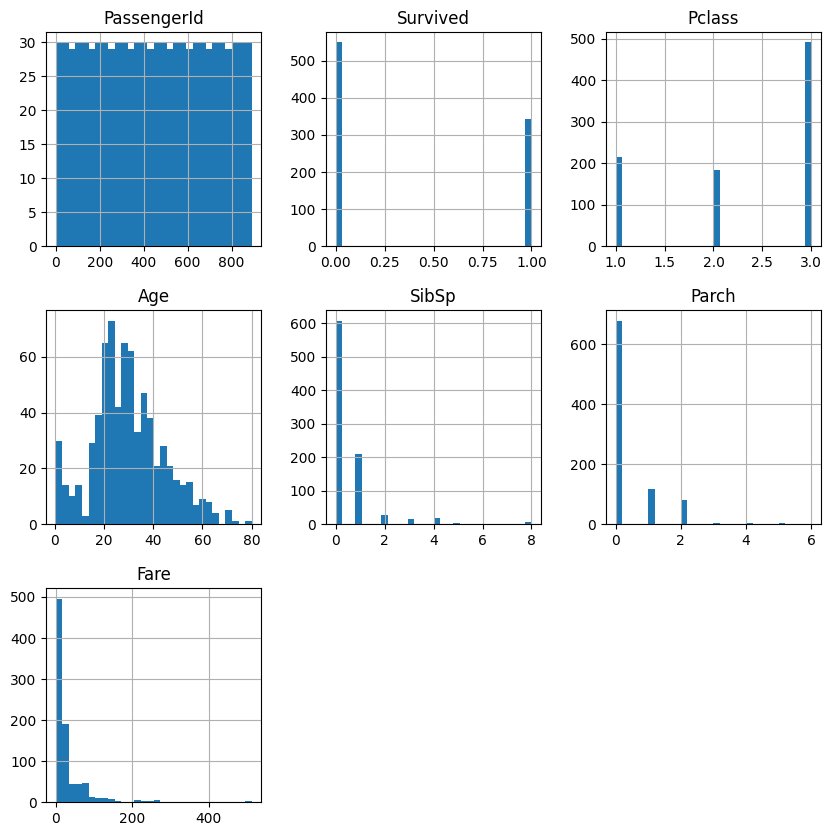

In [3]:
data[data.columns].hist(bins=30, figsize=(10,10))
plt.show()

Ignore PassengerId karena identifier tidak ada insightnya.

Survived (label) lebih banyak berisi label 0 (not survived) dibandingkan 1, maka dataset ini imbalanced.

Pclass right-skewed (condong 3).

Age tergolong left-skewed, banyak di area 20-40 dan ada noticable data spike di 0-10.

SibSp termasuk left-skewed, condong ke 0.

Parch termasuk left-skewed, condong ke 0.

Fare termasuk left-skewed, condong ke 0.

Categorical EDA

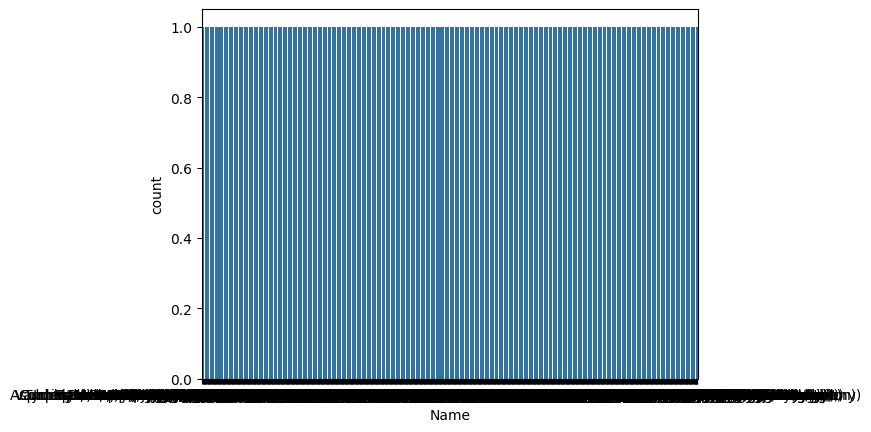

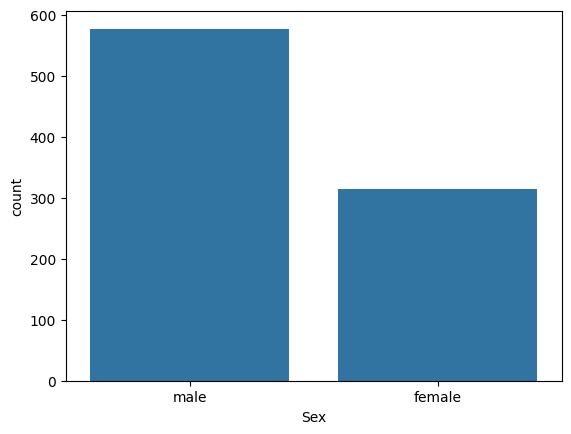

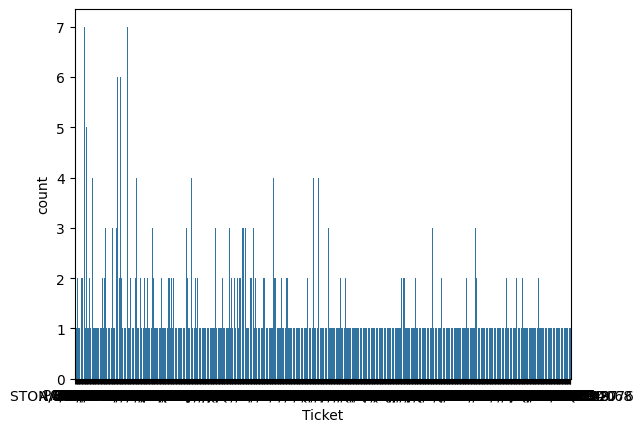

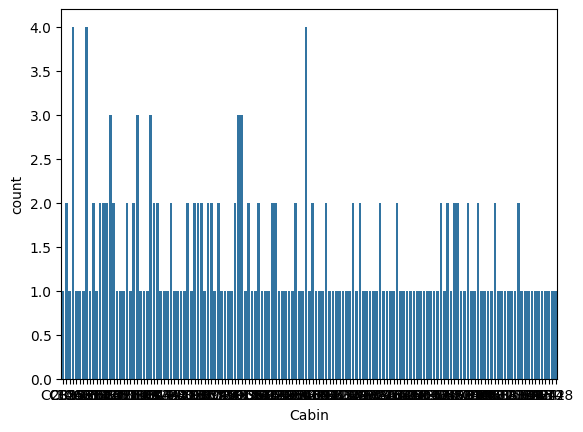

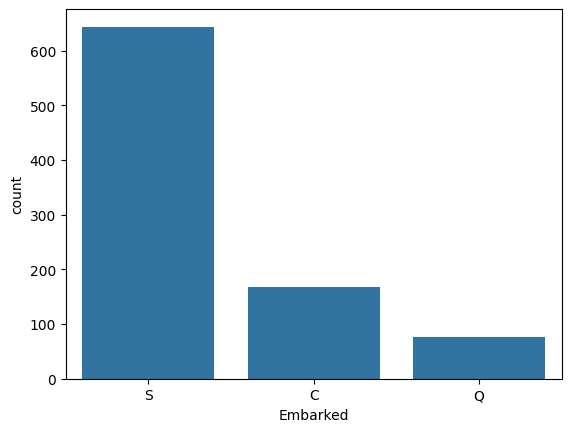

In [4]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for i in categorical_cols:
    sns.countplot(x=data[i], data=data)
    plt.show()

Persebaran data name tidak perlu dihiraukan, sama seperti PassengerId sebagai identifier.

Persebaran data Sex lebih mayoritas tertuju male.

Persebaran data Ticket mayoritas ada 1 yang menandakan tiket unik. Ticket ini sendiri tidak memiliki skala, maka tidak bisa dikatakan distribusi normal ataupun skewed.

Persebaran data Cabin berlaku sama dengan Ticket.

Persebaran data Embarked left-skewed, mayoritas data berisi orang yang memulai perjalanan dari Southampton

### 2. Data Preprocessing


Data Cleaning

In [5]:
# check jumlah data kosong
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dataset Titanic ada 891 baris, dengan threshold 20% maksimal data yang kosong, maka kolom Cabin akan dihapus. Sedangkan Age (19.8%) dan Embarked (0.2%) akan diisi dengan central tendency.

In [6]:
clean_data = data.drop(columns=['Cabin'])

In [7]:
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Hapus data duplikat

In [8]:
clean_data = clean_data.drop_duplicates()

clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Isi data kosong

In [9]:
clean_data['Age'] = clean_data['Age'].fillna(clean_data['Age'].mean())
clean_data['Embarked'] = clean_data['Embarked'].fillna(clean_data['Embarked'].mode()[0])

clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Cek apakah masih ada data kosong

In [10]:
clean_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dari kolom yang diberikan, kolom identifier (PassengerId) tidak digunakan untuk melatih model. Kolom Name juga tidak digunakan sebagai identifier. Kolom Ticket juga akan di drop karena hanya sebagai data nomor tiket (berdasarkan informasi dari Kaggle).

In [11]:
clean_data = clean_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Data transformation (ubah categorical jadi numerical)

Kolom Sex dan Embarked bertipe categorical. Jika diubah menjadi numerical, tidak perlu untuk menyimpan struktur hierarki dari data karena data tersebut bersifat nominal.

In [12]:
clean_data = pd.get_dummies(clean_data, columns=['Sex', 'Embarked'], dtype=int)

transformation = clean_data

clean_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


Untuk data Age dan Fare yang bersifat float dan range yang cukup besar dibandingkan kolom tipe data lainnya, akan dibinning untuk memperkecil range dari data tersebut.

Mengecek max dan min value dari Age untuk bisa memperkirakan jumlah bin.

In [13]:
print(clean_data['Age'].max())
print(clean_data['Age'].min())

80.0
0.42


Dari rentang 0.42 hingga 80, penumpang dapat dibagi menjadi Anak-anak, Remaja, Dewasa, dan Lansia.

Untuk pembagian rentang, akan dibagi dengan langsung mengatur batas bins. 

0-9 = Anak (dilabel 0)

10-17 = Remaja (dilabel 1)

18-59 = Dewasa (dilabel 2)

60-80 = Lansia (dilabel 3)

In [14]:
clean_data['Age'] = pd.cut(clean_data['Age'], bins=[0, 10, 18, 60, 80], right=False, labels=False).astype('Int64')

clean_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,1,0,7.2500,0,1,0,0,1
1,1,1,2,1,0,71.2833,1,0,1,0,0
2,1,3,2,0,0,7.9250,1,0,0,0,1
3,1,1,2,1,0,53.1000,1,0,0,0,1
4,0,3,2,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,2,0,0,13.0000,0,1,0,0,1
887,1,1,2,0,0,30.0000,1,0,0,0,1
888,0,3,2,1,2,23.4500,1,0,0,0,1
889,1,1,2,0,0,30.0000,0,1,1,0,0


Cek max dan min value dari Fare

In [15]:
print(clean_data['Fare'].max())
print(clean_data['Fare'].min())

512.3292
0.0


Membagi fare menjadi 4 bin supaya range data tetap kecil dan pembagian bin dilakukan secara otomatis oleh pandas

In [16]:
# membagi fare menjadi 4 bins secara otomatis dan sekaligus print pembagian dari bin
clean_data['Fare'], bins = pd.qcut(clean_data['Fare'], 4, labels=False, retbins=True)

clean_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,1,0,0,0,1,0,0,1
1,1,1,2,1,0,3,1,0,1,0,0
2,1,3,2,0,0,1,1,0,0,0,1
3,1,1,2,1,0,3,1,0,0,0,1
4,0,3,2,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,2,0,0,1,0,1,0,0,1
887,1,1,2,0,0,2,1,0,0,0,1
888,0,3,2,1,2,2,1,0,0,0,1
889,1,1,2,0,0,2,0,1,1,0,0


Hasil pembagian bins

In [17]:
bins

array([  0.    ,   7.9104,  14.4542,  31.    , 512.3292])

Standarisasi data

In [18]:
label = clean_data['Survived']
clean_data = clean_data.drop(columns=['Survived'])

In [19]:
std = StandardScaler()

scaled_data = pd.DataFrame(std.fit_transform(clean_data), columns=clean_data.columns)

scaled_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,0.290914,0.432793,-0.473674,-1.339737,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.290914,0.432793,-0.473674,1.344758,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,0.290914,-0.474545,-0.473674,-0.444905,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.290914,0.432793,-0.473674,1.344758,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.290914,-0.474545,-0.473674,-0.444905,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.290914,-0.474545,-0.473674,-0.444905,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,0.290914,-0.474545,-0.473674,0.449927,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,0.290914,0.432793,2.008933,0.449927,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,0.290914,-0.474545,-0.473674,0.449927,-0.737695,0.737695,2.074505,-0.307562,-1.623803


Cek korelasi fitur terhadap label

Gabung sementara label ke dalam scaled_data

In [20]:
scaled_data['Survived'] = label

scaled_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.827377,0.290914,0.432793,-0.473674,-1.339737,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0
1,-1.566107,0.290914,0.432793,-0.473674,1.344758,1.355574,-1.355574,2.074505,-0.307562,-1.623803,1
2,0.827377,0.290914,-0.474545,-0.473674,-0.444905,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1
3,-1.566107,0.290914,0.432793,-0.473674,1.344758,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1
4,0.827377,0.290914,-0.474545,-0.473674,-0.444905,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.290914,-0.474545,-0.473674,-0.444905,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0
887,-1.566107,0.290914,-0.474545,-0.473674,0.449927,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1
888,0.827377,0.290914,0.432793,2.008933,0.449927,1.355574,-1.355574,-0.482043,-0.307562,0.615838,0
889,-1.566107,0.290914,-0.474545,-0.473674,0.449927,-0.737695,0.737695,2.074505,-0.307562,-1.623803,1


In [21]:
data_corr = scaled_data.corr()

data_corr

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
Pclass,1.000000,-0.161402,0.083081,0.018443,-0.634271,-0.131900,0.131900,-0.243292,0.221009,0.074053,-0.338481
Age,-0.161402,1.000000,-0.343806,-0.338568,-0.144856,-0.113963,0.113963,0.001559,0.027440,-0.018637,-0.141733
SibSp,0.083081,-0.343806,1.000000,0.414838,0.393025,0.114631,-0.114631,-0.059528,-0.026354,0.068734,-0.035322
Parch,0.018443,-0.338568,0.414838,1.000000,0.393881,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.081629
Fare,-0.634271,-0.144856,0.393025,0.393881,1.000000,0.243613,-0.243613,0.186073,-0.240489,-0.011668,0.299357
Sex_female,-0.131900,-0.113963,0.114631,0.245489,0.243613,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.543351
Sex_male,0.131900,0.113963,-0.114631,-0.245489,-0.243613,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.543351
Embarked_C,-0.243292,0.001559,-0.059528,-0.011069,0.186073,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.168240
Embarked_Q,0.221009,0.027440,-0.026354,-0.081228,-0.240489,0.074115,-0.074115,-0.148258,1.000000,-0.499421,0.003650
Embarked_S,0.074053,-0.018637,0.068734,0.060814,-0.011668,-0.119224,0.119224,-0.782742,-0.499421,1.000000,-0.149683


<Axes: >

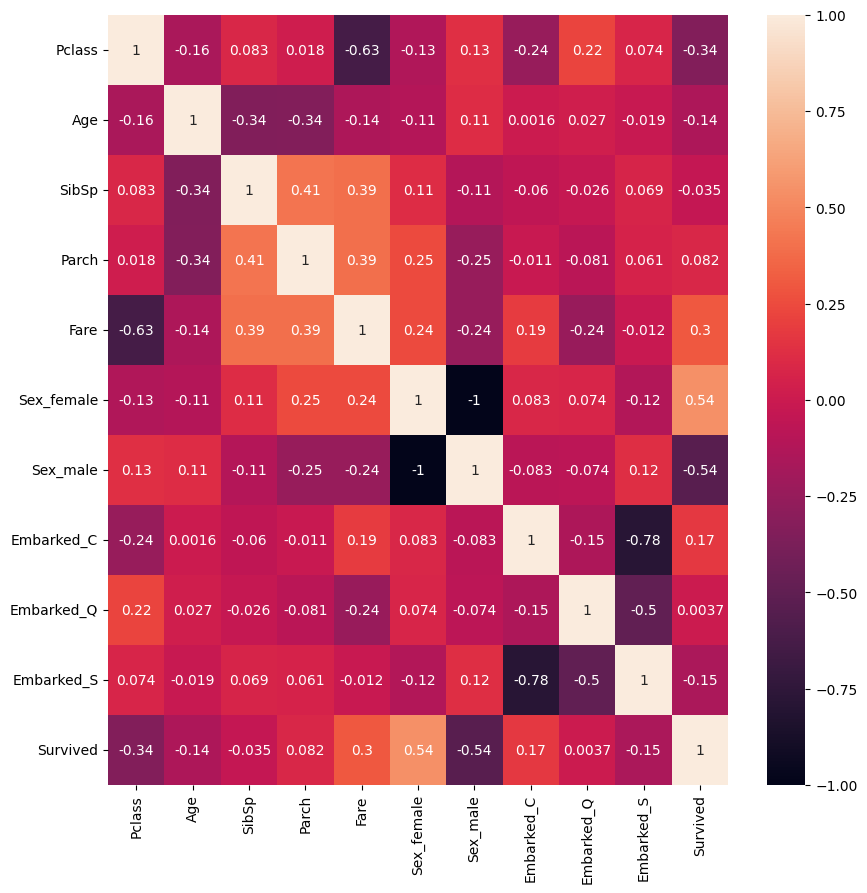

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True)

Feature selection, ambil fitur dengan korelasi diatas 0.2 dan dibawah 0.9

In [23]:
correlation_survived = data_corr['Survived'].drop('Survived')

used_features = correlation_survived[(correlation_survived.abs() >= 0.2) & (correlation_survived.abs() <= 0.9)].index.tolist()

used_features

['Pclass', 'Fare', 'Sex_female', 'Sex_male']

In [24]:
final_data = scaled_data[used_features]

In [25]:
final_data

,Pclass,Fare,Sex_female,Sex_male
0,0.827377,-1.339737,-0.737695,0.737695
1,-1.566107,1.344758,1.355574,-1.355574
2,0.827377,-0.444905,1.355574,-1.355574
3,-1.566107,1.344758,1.355574,-1.355574
4,0.827377,-0.444905,-0.737695,0.737695
...,...,...,...,...
886,-0.369365,-0.444905,-0.737695,0.737695
887,-1.566107,0.449927,1.355574,-1.355574
888,0.827377,0.449927,1.355574,-1.355574
889,-1.566107,0.449927,-0.737695,0.737695


In [26]:
X_train, X_val, y_train, y_val = train_test_split(final_data, label, test_size = 0.2, random_state = 42)

In [27]:
X_train

,Pclass,Fare,Sex_female,Sex_male
331,-1.566107,0.449927,-0.737695,0.737695
733,-0.369365,-0.444905,-0.737695,0.737695
382,0.827377,-0.444905,-0.737695,0.737695
704,0.827377,-1.339737,-0.737695,0.737695
813,0.827377,1.344758,1.355574,-1.355574
...,...,...,...,...
106,0.827377,-1.339737,1.355574,-1.355574
270,-1.566107,0.449927,-0.737695,0.737695
860,0.827377,-0.444905,-0.737695,0.737695
435,-1.566107,1.344758,1.355574,-1.355574


In [28]:
X_val

,Pclass,Fare,Sex_female,Sex_male
709,0.827377,0.449927,-0.737695,0.737695
439,-0.369365,-0.444905,-0.737695,0.737695
840,0.827377,-0.444905,-0.737695,0.737695
720,-0.369365,1.344758,1.355574,-1.355574
39,0.827377,-0.444905,1.355574,-1.355574
...,...,...,...,...
433,0.827377,-1.339737,-0.737695,0.737695
773,0.827377,-1.339737,-0.737695,0.737695
25,0.827377,1.344758,1.355574,-1.355574
84,-0.369365,-0.444905,1.355574,-1.355574


## 3. Training Models

Models : 

- LogisticRegression
- LinearSVC
- KNeighborsClassifier
- GaussianNB
- DecisionTreeClassifier
- RandomForestClassifier

Metrics : 

- Accuracy
- Precision
- Recall / Sensitivity
- F1-Score

Logistic Regression

In [29]:
lr = LogisticRegression(max_iter = 100, random_state = 42)

lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [30]:
y_pred = lr.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[88 17]
 [22 52]]


Linear SVC

In [31]:
svc = LinearSVC(max_iter = 100, random_state=42)

svc.fit(X_train, y_train)

LinearSVC(max_iter=100, random_state=42)

In [32]:
y_pred = svc.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[88 17]
 [22 52]]


KNN - Classifier

In [33]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       105
           1       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

[[101   4]
 [ 38  36]]


Gaussian Naive Bayes

In [35]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred = nb.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[88 17]
 [22 52]]


Decision Tree Classifier

In [37]:
dt = DecisionTreeClassifier(random_state=42 )

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred = dt.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       105
           1       0.77      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179

[[91 14]
 [26 48]]


Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       105
           1       0.77      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179

[[91 14]
 [26 48]]


Dari hasil tersebut, Logistic Regression, Support Vector Machine Classifier, dan Gaussian Naive Bayes memiliki hasil metric yang setara dari keempat metric tersebut dan merupakan hasil yang terbaik dari classification report yang dibuat.

Maka dari itu, Cross Validation dan Hyperparameter search dilakukan untuk mencari model terbaik dari 3 pilihan yang ada.

Cross Validation menggunakan Stratified K-Fold yang akan membagi pembagian dataset dari masing-masing label lebih seimbang.  

In [41]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Hyperparameter search, Logistic Regression

In [42]:
parameter_grid = {'C': [0.01, 0.1, 1, 10]}

In [43]:
grid_search_lr = GridSearchCV(lr, parameter_grid, cv=skf, scoring='accuracy', n_jobs=-1)

In [44]:
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_, grid_search_lr.best_score_)

{'C': 0.01} 0.7880281690140845


Hyperparameter search, Linear SVC

In [45]:
parameter_grid = {'C' : [0.01, 0.1, 1, 10], 'tol': [1e-4, 1e-3]}

In [46]:
grid_search_svc = GridSearchCV(svc, parameter_grid, cv=skf, scoring='accuracy', n_jobs=-1)

In [47]:
grid_search_svc.fit(X_train, y_train)
print(grid_search_svc.best_params_, grid_search_svc.best_score_)

{'C': 0.01, 'tol': 0.0001} 0.7880281690140845


Hyperparameter search, Gaussian Naive Bayes

In [48]:
parameter_grid = {'var_smoothing': np.logspace(-10, -6, 7)}

In [49]:
grid_search_nb = GridSearchCV(nb, parameter_grid, cv=skf, scoring='accuracy', n_jobs=-1)

In [50]:
grid_search_nb.fit(X_train, y_train)
print(grid_search_nb.best_params_, grid_search_nb.best_score_)

{'var_smoothing': np.float64(1e-10)} 0.7880281690140845


Dengan hyperparameter, semua memberikan best score yang sama. Maka dari itu, Logistic Regression akan diambil menjadi model utama karena tergolong model yang simpel dan mudah dipahami / diinterpretasi (linear model).

Cek akurasi model terhadap test.csv

In [51]:
test_data = pd.read_csv('test.csv')

In [52]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Melakukan preprocessing steps yang sama dengan train

In [53]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
clean_test_data = test_data.drop(columns=['Cabin'])
clean_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [55]:
clean_test_data = clean_test_data.drop_duplicates()

clean_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [56]:
clean_test_data['Age'] = clean_test_data['Age'].fillna(clean_test_data['Age'].mean())
clean_test_data['Embarked'] = clean_test_data['Embarked'].fillna(clean_test_data['Embarked'].mode()[0])

clean_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [57]:
clean_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Karena ada perbedaan disini dimana ada Fare yang kosong 1 baris, khusus di bagian test ini akan diisi sehingga berbeda sedikit dari tahapan train.

In [58]:
clean_test_data['Fare'] = clean_test_data['Fare'].fillna(clean_test_data['Fare'].mean())

In [59]:
clean_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [60]:
clean_test_data = clean_test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

clean_test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [61]:
clean_test_data = pd.get_dummies(clean_test_data, columns=['Sex', 'Embarked'], dtype=int)

clean_test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [62]:
clean_test_data['Age'] = pd.cut(clean_test_data['Age'], bins=[0, 10, 18, 60, 80], right=False, labels=False).astype('Int64')

clean_test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,2,0,0,7.8292,0,1,0,1,0
1,3,2,1,0,7.0000,1,0,0,0,1
2,2,3,0,0,9.6875,0,1,0,1,0
3,3,2,0,0,8.6625,0,1,0,0,1
4,3,2,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,2,0,0,8.0500,0,1,0,0,1
414,1,2,0,0,108.9000,1,0,1,0,0
415,3,2,0,0,7.2500,0,1,0,0,1
416,3,2,0,0,8.0500,0,1,0,0,1


In [63]:
clean_test_data['Fare'], bins = pd.qcut(clean_test_data['Fare'], 4, labels=False, retbins=True)

clean_test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,2,0,0,0,0,1,0,1,0
1,3,2,1,0,0,1,0,0,0,1
2,2,3,0,0,1,0,1,0,1,0
3,3,2,0,0,1,0,1,0,0,1
4,3,2,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,2,0,0,1,0,1,0,0,1
414,1,2,0,0,3,1,0,1,0,0
415,3,2,0,0,0,0,1,0,0,1
416,3,2,0,0,1,0,1,0,0,1


In [64]:
bins

array([  0.    ,   7.8958,  14.4542,  31.5   , 512.3292])

In [65]:
std = StandardScaler()

scaled_test_data = pd.DataFrame(std.fit_transform(clean_test_data), columns=clean_test_data.columns)

scaled_test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.219470,-0.499470,-0.400248,-1.296681,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,0.219470,0.616992,-0.400248,-1.296681,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,2.171357,-0.499470,-0.400248,-0.415360,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,0.219470,-0.499470,-0.400248,-0.415360,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,0.219470,0.616992,0.619896,-0.415360,1.322876,-1.322876,-0.568142,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,0.219470,-0.499470,-0.400248,-0.415360,-0.755929,0.755929,-0.568142,-0.351647,0.740370
414,-1.505120,0.219470,-0.499470,-0.400248,1.347283,1.322876,-1.322876,1.760125,-0.351647,-1.350676
415,0.873482,0.219470,-0.499470,-0.400248,-1.296681,-0.755929,0.755929,-0.568142,-0.351647,0.740370
416,0.873482,0.219470,-0.499470,-0.400248,-0.415360,-0.755929,0.755929,-0.568142,-0.351647,0.740370


Untuk bagian korelasi, langsung mengambil kolom yang digunakan saja

In [66]:
final_test_data = scaled_test_data[['Pclass', 'Fare', 'Sex_female', 'Sex_male']]
final_test_data

,Pclass,Fare,Sex_female,Sex_male
0,0.873482,-1.296681,-0.755929,0.755929
1,0.873482,-1.296681,1.322876,-1.322876
2,-0.315819,-0.415360,-0.755929,0.755929
3,0.873482,-0.415360,-0.755929,0.755929
4,0.873482,-0.415360,1.322876,-1.322876
...,...,...,...,...
413,0.873482,-0.415360,-0.755929,0.755929
414,-1.505120,1.347283,1.322876,-1.322876
415,0.873482,-1.296681,-0.755929,0.755929
416,0.873482,-0.415360,-0.755929,0.755929


Prediksi dengan test data

In [67]:
y_val_pred = lr.predict(final_test_data)

Hasil dari prediksi.

In [68]:
y_val_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### 4. Simpan model (Logistic Regression)

In [69]:
# save model
joblib.dump(lr, 'lr.pkl')

['lr.pkl']

In [70]:
joblib.dump(used_features, 'features.pkl')

['features.pkl']

In [71]:
joblib.dump(transformation, 'transform.pkl')

['transform.pkl']

In [72]:
X_for_scaler = transformation[used_features]

std = StandardScaler()
std.fit(X_for_scaler)

joblib.dump(std, 'std.pkl')

['std.pkl']